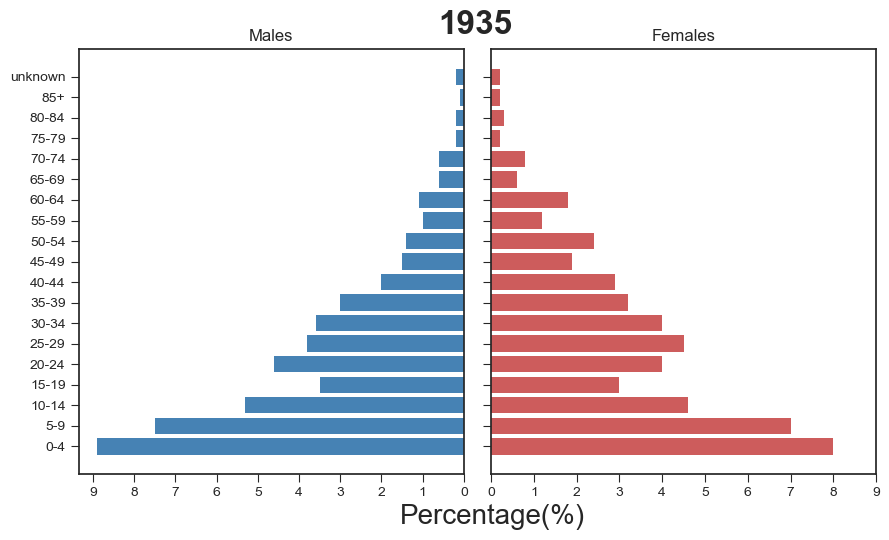

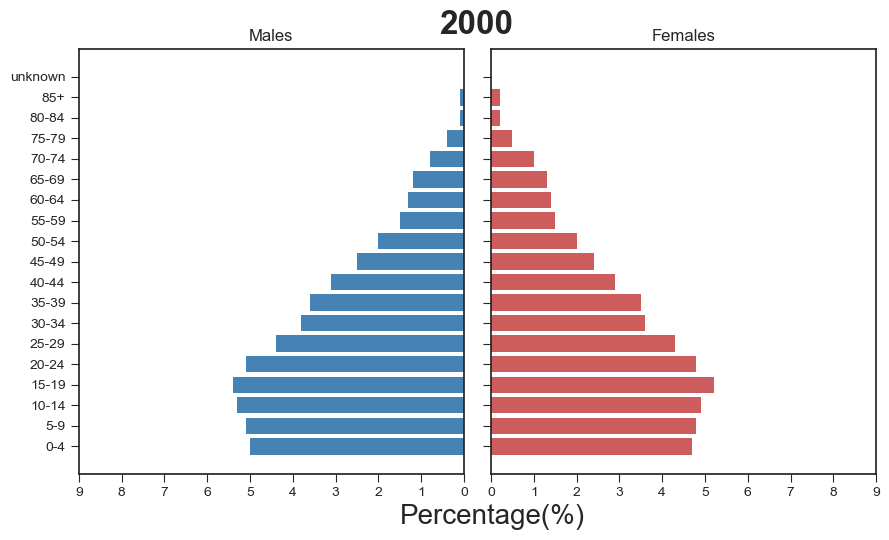

In [332]:
#mudule import
import os
from PyPDF2 import PdfReader
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tkinter import *
import PIL
from PIL import ImageTk
from PIL import Image

#text extraction
os.chdir("--YOUR_PATH--") #example: C:\\Users\\Casper\\Desktop
reader = PdfReader("İstatistik_Göstergeler_Türkiye_1923-2013.pdf")
page1 = reader.pages[17]
text = page1.extractText()
patern = r"\s\d{1},\d"

#pandas storage

df = pd.DataFrame(index=["male_year35", "male_year40", "male_year45","male_year50", "male_year55", "male_year60", "male_year65",
                         "male_year70", "male_year75", "male_year80", "male_year85", "male_year90", "male_year2000",
                         "female_year35", "female_year40", "female_year45", "female_year50", "female_year55", "female_year60", "female_year65",
                         "female_year70", "female_year75", "female_year80", "female_year85", "female_year90", "female_year2000"],
                  
     columns=["0-4", "5-9", "10-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40-44", 
              "45-49", "50-54", "55-59", "60-64", "65-69", "70-74", "75-79", "80-84", "85+", "unknown"])

#storing

i=1 
k=0

while i<=26:
    df.iloc[i-1:i,0:9]=re.findall(patern,text)[k:k+9]
    k += 9
    i += 1

i=1
while i<=26:
        df.iloc[i-1:i,9:19]=re.findall(patern,text)[k:k+10]
        k += 10
        i += 1

df = df.replace({r','}, {"."}, regex=True)
dff = df.astype(float)
df_t = dff.transpose()

#chart function

def chart (male, female, year):

    fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(9, 5))
            
    axes[0].barh(df_t.index, male, color="steelblue")
    axes[0].set(title="Males")
    
    axes[1].barh(df_t.index, female, color="indianred")
    axes[1].set(title="Females")
    
    x = [*range(10)]
    axes[0].set(xticks=x, xticklabels= x)
    axes[1].set(xticks=x, xticklabels= x)
    
    axes[0].invert_xaxis()
    
    plt.figtext(.493, 0.96, year, fontsize=24, weight="bold")
    plt.figtext(.45, -0.02, "Percentage(%)", fontsize=20)
    
    plt.tight_layout()
    
    plt.show()

#control panel
root = Tk()
root.geometry("100x350")

#buttons    
b1 = Button(root, text="1935", command = lambda: chart(df_t["male_year35"], df_t["female_year35"], 1935))
b1.pack()
b2 = Button(root, text="1940", command = lambda: chart(df_t["male_year40"], df_t["female_year40"], 1940))
b2.pack()
b3 = Button(root, text="1945", command = lambda: chart(df_t["male_year45"], df_t["female_year45"], 1945))
b3.pack()
b4 = Button(root, text="1950", command = lambda: chart(df_t["male_year50"], df_t["female_year50"], 1950))
b4.pack()
b5 = Button(root, text="1955", command = lambda: chart(df_t["male_year55"], df_t["female_year55"], 1955))
b5.pack()
b6 = Button(root, text="1960", command = lambda: chart(df_t["male_year60"], df_t["female_year60"], 1960))
b6.pack()
b7 = Button(root, text="1965", command = lambda: chart(df_t["male_year65"], df_t["female_year65"], 1965))
b7.pack()
b8 = Button(root, text="1970", command = lambda: chart(df_t["male_year70"], df_t["female_year70"], 1970))
b8.pack()
b9 = Button(root, text="1975", command = lambda: chart(df_t["male_year75"], df_t["female_year75"], 1975))
b9.pack()
b10 = Button(root, text="1980", command = lambda: chart(df_t["male_year80"], df_t["female_year80"], 1980))
b10.pack()
b11 = Button(root, text="1985", command = lambda: chart(df_t["male_year85"], df_t["female_year85"], 1985))
b11.pack()
b12 = Button(root, text="1990", command = lambda: chart(df_t["male_year90"], df_t["female_year90"], 1990))
b12.pack()
b13 = Button(root, text="2000", command = lambda: chart(df_t["male_year2000"], df_t["female_year2000"], 2000))
b13.pack()

root.mainloop()

#see examples below